**Roya Ghamari**

**Student ID: 2071969**

**May 2024**

In [ ]:
import numpy as np
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Generating synthetic data:

In [ ]:
def generate_logistic_data(m, d, k, test_size=0.2):

    np.random.seed(0)
    A = np.random.normal(0, 1, (m, d))  # Feature matrix A generated from N(0,1)
    x = np.random.normal(0, 1, (d, k))  # Parameter matrix x
    e = np.random.normal(0, 1, (m, k))  # Noise matrix e

    scores = A @ x + e
    b = np.argmax(scores, axis=1)  # Determine class labels by max scoring class

    A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=test_size, random_state=42)
    return A_train, A_test, b_train, b_test


In [ ]:
m, d, k = 1000, 1000, 50
A_train, A_test, b_train, b_test = generate_logistic_data(m, d, k, test_size=0.2)

Generating logistic regression objective function and related functions:

In [ ]:
def generate_logistic_objective(A, b, k):

    m, d = A.shape

    def f(X):
        exp_terms = np.exp(A @ X)
        sum_exp = exp_terms.sum(axis=1, keepdims=True)
        log_prob = np.log(sum_exp)
        correct_class_scores = exp_terms[np.arange(m), b]
        loss = -np.sum(np.log(correct_class_scores) - log_prob)
        return loss

    def grad_f(X):
        exp_terms = np.exp(A @ X)
        sum_exp = exp_terms.sum(axis=1, keepdims=True)
        probs = exp_terms / sum_exp
        indicator = np.zeros_like(probs)
        indicator[np.arange(m), b] = 1
        gradient = -A.T @ (indicator - probs)
        return gradient

    return f, grad_f


In [ ]:
def softmax(Z):

    e_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return e_Z / e_Z.sum(axis=1, keepdims=True)

def compute_accuracy(X, A, b):

    predictions = softmax(A @ X)
    predicted_classes = np.argmax(predictions, axis=1)
    return np.mean(predicted_classes == b)


In [ ]:
def gradient_descent(A_train, b_train, A_test, b_test, k, initial_X_gd, num_iterations, step_size_strategy, initial_learning_rate):
    X = initial_X_gd
    m, d = A_train.shape
    accuracies_train = []
    accuracies_test = []
    losses_train = []
    losses_test = []
    times = []
    start_time = time.time()

    # Get the functions for calculating the objective and gradient for training and test data
    f_train, grad_f_train = generate_logistic_objective(A_train, b_train, k)

    f_test, _ = generate_logistic_objective(A_test, b_test, k)

    for i in range(num_iterations):
        # Use the provided function to calculate gradient
        gradient = grad_f_train(X)

        alpha = initial_learning_rate

        X -= alpha * gradient

        if i % 10 == 0 or i == num_iterations:
            current_time = time.time() - start_time
            times.append(current_time)

            accuracy_train = compute_accuracy(X, A_train, b_train)
            accuracy_test = compute_accuracy(X, A_test, b_test)
            accuracies_train.append(accuracy_train)
            accuracies_test.append(accuracy_test)

            loss_train = f_train(X)
            loss_test = f_test(X)
            losses_train.append(loss_train)
            losses_test.append(loss_test)

            print(f"Iteration {i}: Time: {current_time:.2f}s, Train Acc: {accuracy_train:.4f}, Test Acc: {accuracy_test:.4f}, Train Loss: {loss_train:.4f}, Test Loss: {loss_test:.4f}")

    total_time = time.time() - start_time
    return X, accuracies_train, accuracies_test, losses_train, losses_test, times, total_time


In [ ]:
np.random.seed(42)
initial_X_gd = np.random.normal(0, 1, (d, k))


overall_start_time = time.time()


X_train_opt_gd, accuracies_train_gd, accuracies_test_gd, losses_train_gd, losses_test_gd, train_times_gd, total_train_time_gd = gradient_descent(
    A_train, b_train, A_test, b_test, k, initial_X_gd, 300, 'fixed', 1e-3
)


total_time = time.time() - overall_start_time


print("GD Training Complete")
print(f"Final GD Train Accuracy: {accuracies_train_gd[-1]:.4f}")
print(f"Final GD Test Accuracy: {accuracies_test_gd[-1]:.4f}")
print(f"Final GD Train Loss: {losses_train_gd[-1]:.4f}")
print(f"Final GD Test Loss: {losses_test_gd[-1]:.4f}")
print(f"GD Total Training Time: {total_train_time_gd:.2f} seconds")


Iteration 0: Time: 0.03s, Train Acc: 0.0225, Test Acc: 0.0050, Train Loss: 44454639.7166, Test Loss: 2955749.8764
Iteration 10: Time: 0.28s, Train Acc: 0.0850, Test Acc: 0.0050, Train Loss: 32875461.5742, Test Loss: 2898520.6051
Iteration 20: Time: 0.48s, Train Acc: 0.1625, Test Acc: 0.0050, Train Loss: 23546845.4720, Test Loss: 2851438.9550
Iteration 30: Time: 0.61s, Train Acc: 0.2762, Test Acc: 0.0050, Train Loss: 16074452.0250, Test Loss: 2813589.1143
Iteration 40: Time: 0.74s, Train Acc: 0.4425, Test Acc: 0.0050, Train Loss: 10408286.3204, Test Loss: 2784266.5062
Iteration 50: Time: 0.87s, Train Acc: 0.6062, Test Acc: 0.0050, Train Loss: 6491516.6971, Test Loss: 2763965.7762
Iteration 60: Time: 1.01s, Train Acc: 0.7300, Test Acc: 0.0050, Train Loss: 3839805.6122, Test Loss: 2751426.9538
Iteration 70: Time: 1.17s, Train Acc: 0.8325, Test Acc: 0.0050, Train Loss: 2099737.8589, Test Loss: 2747126.3470
Iteration 80: Time: 1.30s, Train Acc: 0.9087, Test Acc: 0.0050, Train Loss: 1131463.

In [ ]:
def gauss_southwell_bcgd(A_train, b_train, A_test, b_test, k, initial_X_bcgd, learning_rate, num_iterations):
    X = initial_X_bcgd
    m, d = A_train.shape
    accuracies_train = []
    accuracies_test = []
    losses_train = []
    losses_test = []
    times = []
    start_time = time.time()

    # Get the functions for calculating the objective and gradient for training and test data
    f_train, grad_f_train = generate_logistic_objective(A_train, b_train, k)

    f_test, _ = generate_logistic_objective(A_test, b_test, k)

    for i in range(num_iterations):
        # Calculate gradients for each class and find the class with the largest gradient norm
        gradient_norms = [np.linalg.norm(grad_f_train(X)[:, j]) for j in range(k)]
        idx = np.argmax(gradient_norms)
        block_gradient = grad_f_train(X)[:, idx]
        X[:, idx] -= learning_rate * block_gradient

        if i % 10 == 0:
            current_time = time.time() - start_time
            times.append(current_time)

            accuracy_train = compute_accuracy(X, A_train, b_train)
            accuracy_test = compute_accuracy(X, A_test, b_test)
            accuracies_train.append(accuracy_train)
            accuracies_test.append(accuracy_test)

            loss_train = f_train(X)
            loss_test = f_test(X)
            losses_train.append(loss_train)
            losses_test.append(loss_test)

            print(f"Iteration {i}: Time: {current_time:.2f}s, Train Acc: {accuracy_train:.4f}, Test Acc: {accuracy_test:.4f}, Train Loss: {loss_train:.4f}, Test Loss: {loss_test:.4f}, Updating class {idx}")

    total_time = time.time() - start_time
    return X, accuracies_train, accuracies_test, losses_train, losses_test, times, total_time


In [ ]:
np.random.seed(42)


initial_X_bcgd = np.random.normal(0, 1, (d, k))


optimized_X_bcgd, accuracies_train_bcgd, accuracies_test_bcgd, losses_train_bcgd, losses_test_bcgd, times_bcgd, total_time_bcgd = gauss_southwell_bcgd(
    A_train, b_train, A_test, b_test, k, initial_X_bcgd, 1e-3, 300
)

print("BCGD Optimization finished.")
if accuracies_train_bcgd:
    print(f"Final BCGD Train Accuracy: {accuracies_train_bcgd[-1]:.4f}")
    print(f"Final BCGD Test Accuracy: {accuracies_test_bcgd[-1]:.4f}")
else:
    print("No BCGD accuracy data available.")

if losses_train_bcgd:
    print(f"Final BCGD Train Loss: {losses_train_bcgd[-1]:.4f}")
    print(f"Final BCGD Test Loss: {losses_test_bcgd[-1]:.4f}")
else:
    print("No BCGD loss data available.")

print(f"BCGD Total time: {total_time_bcgd:.2f} seconds")


Iteration 0: Time: 0.54s, Train Acc: 0.0187, Test Acc: 0.0050, Train Loss: 45729801.7206, Test Loss: 2961943.4759, Updating class 41
Iteration 10: Time: 9.30s, Train Acc: 0.0200, Test Acc: 0.0050, Train Loss: 45386514.6039, Test Loss: 2960035.8381, Updating class 36
Iteration 20: Time: 14.61s, Train Acc: 0.0213, Test Acc: 0.0050, Train Loss: 45060415.0690, Test Loss: 2958200.3506, Updating class 44
Iteration 30: Time: 23.07s, Train Acc: 0.0213, Test Acc: 0.0050, Train Loss: 44745133.2088, Test Loss: 2956374.0679, Updating class 13
Iteration 40: Time: 29.16s, Train Acc: 0.0213, Test Acc: 0.0050, Train Loss: 44439399.4861, Test Loss: 2954996.5802, Updating class 13
Iteration 50: Time: 36.95s, Train Acc: 0.0250, Test Acc: 0.0050, Train Loss: 44142887.1082, Test Loss: 2953700.8741, Updating class 34
Iteration 60: Time: 42.71s, Train Acc: 0.0288, Test Acc: 0.0050, Train Loss: 43851087.6450, Test Loss: 2952375.5106, Updating class 20
Iteration 70: Time: 50.39s, Train Acc: 0.0288, Test Acc: 0

In [ ]:
np.random.seed(42)


initial_X_bcgd = np.random.normal(0, 1, (d, k))


optimized_X_bcgd, accuracies_train_bcgd, accuracies_test_bcgd, losses_train_bcgd, losses_test_bcgd, times_bcgd, total_time_bcgd = gauss_southwell_bcgd(
    A_train, b_train, A_test, b_test, k, initial_X_bcgd, 1e-1, 300
)

print("BCGD Optimization finished.")
if accuracies_train_bcgd:
    print(f"Final BCGD Train Accuracy: {accuracies_train_bcgd[-1]:.4f}")
    print(f"Final BCGD Test Accuracy: {accuracies_test_bcgd[-1]:.4f}")
else:
    print("No BCGD accuracy data available.")

if losses_train_bcgd:
    print(f"Final BCGD Train Loss: {losses_train_bcgd[-1]:.4f}")
    print(f"Final BCGD Test Loss: {losses_test_bcgd[-1]:.4f}")
else:
    print("No BCGD loss data available.")

print(f"BCGD Total time: {total_time_bcgd:.2f} seconds")


Iteration 0: Time: 1.16s, Train Acc: 0.0425, Test Acc: 0.0050, Train Loss: 44325659.6896, Test Loss: 2942268.4235, Updating class 41
Iteration 10: Time: 7.00s, Train Acc: 0.2562, Test Acc: 0.0100, Train Loss: 32554878.1564, Test Loss: 2894033.2662, Updating class 20
Iteration 20: Time: 16.12s, Train Acc: 0.4363, Test Acc: 0.0050, Train Loss: 22200925.3335, Test Loss: 2883401.5371, Updating class 42
Iteration 30: Time: 21.80s, Train Acc: 0.6225, Test Acc: 0.0100, Train Loss: 13571215.6043, Test Loss: 2858590.2120, Updating class 31
Iteration 40: Time: 29.53s, Train Acc: 0.7725, Test Acc: 0.0150, Train Loss: 6340574.5155, Test Loss: 2848917.8569, Updating class 39
Iteration 50: Time: 35.15s, Train Acc: 0.8838, Test Acc: 0.0100, Train Loss: 1275673.6780, Test Loss: 2824782.7568, Updating class 19
Iteration 60: Time: 41.89s, Train Acc: 0.9350, Test Acc: 0.0100, Train Loss: 640142.2161, Test Loss: 2804029.2925, Updating class 25
Iteration 70: Time: 48.23s, Train Acc: 0.9613, Test Acc: 0.010

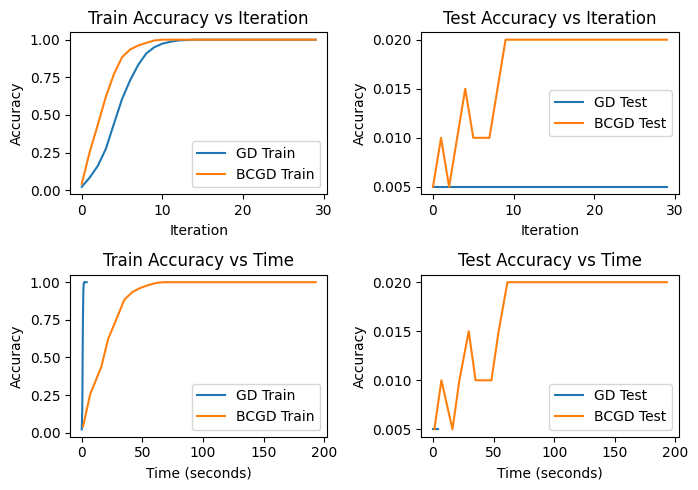

In [ ]:
import matplotlib.pyplot as plt


# Plotting Accuracy vs Iteration for Train and Test
plt.figure(figsize=(7, 5))

# Accuracy vs Iteration for Train
plt.subplot(2, 2, 1)
plt.plot(accuracies_train_gd, label='GD Train')
plt.plot(accuracies_train_bcgd, label='BCGD Train')
plt.title('Train Accuracy vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()

# Accuracy vs Iteration for Test
plt.subplot(2, 2, 2)
plt.plot(accuracies_test_gd, label='GD Test')
plt.plot(accuracies_test_bcgd, label='BCGD Test')
plt.title('Test Accuracy vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Accuracy vs Time for Train and Test
# Accuracy vs Time for Train
plt.subplot(2, 2, 3)
plt.plot(train_times_gd, accuracies_train_gd, label='GD Train')
plt.plot(times_bcgd, accuracies_train_bcgd, label='BCGD Train')
plt.title('Train Accuracy vs Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Accuracy')
plt.legend()

# Accuracy vs Time for Test
plt.subplot(2, 2, 4)
plt.plot(train_times_gd, accuracies_test_gd, label='GD Test')
plt.plot(times_bcgd, accuracies_test_bcgd, label='BCGD Test')
plt.title('Test Accuracy vs Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


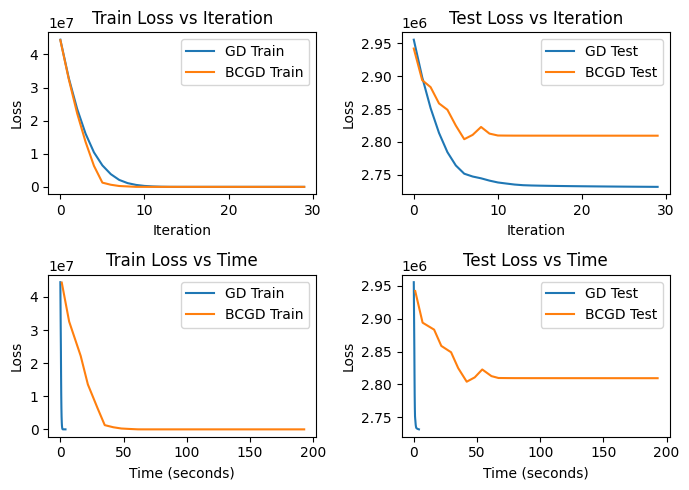

In [ ]:
import matplotlib.pyplot as plt

# Plotting Loss vs Iteration for Train and Test
plt.figure(figsize=(7, 5))

# Loss vs Iteration for Train
plt.subplot(2, 2, 1)
plt.plot(losses_train_gd, label='GD Train')
plt.plot(losses_train_bcgd, label='BCGD Train')
plt.title('Train Loss vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

# Loss vs Iteration for Test
plt.subplot(2, 2, 2)
plt.plot(losses_test_gd, label='GD Test')
plt.plot(losses_test_bcgd, label='BCGD Test')
plt.title('Test Loss vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

# Plotting Loss vs Time for Train and Test
# Loss vs Time for Train
plt.subplot(2, 2, 3)
plt.plot(train_times_gd, losses_train_gd, label='GD Train')
plt.plot(times_bcgd, losses_train_bcgd, label='BCGD Train')
plt.title('Train Loss vs Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Loss')
plt.legend()

# Loss vs Time for Test
plt.subplot(2, 2, 4)
plt.plot(train_times_gd, losses_test_gd, label='GD Test')
plt.plot(times_bcgd, losses_test_bcgd, label='BCGD Test')
plt.title('Test Loss vs Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Fashion-MNIST data:

In [ ]:
import torchvision as tv


In [ ]:
# Define transformation pipeline
transform = tv.transforms.Compose([
    tv.transforms.ToTensor(),  # Converts to [0, 1] range
    tv.transforms.Lambda(lambda x: x.view(-1))  # Flattens the image
])

# Load Fashion-MNIST data
FMNIST_train = tv.datasets.FashionMNIST('data/', train=True, download=True, transform=transform)
FMNIST_test = tv.datasets.FashionMNIST('data/', train=False, download=True, transform=transform)



In [ ]:
Xtrain = FMNIST_train.data.numpy().reshape((FMNIST_train.data.shape[0], -1)).astype(np.float32) / 255.0
Xtest = FMNIST_test.data.numpy().reshape((FMNIST_test.data.shape[0], -1)).astype(np.float32) / 255.0
ytrain = FMNIST_train.targets.numpy()
ytest = FMNIST_test.targets.numpy()

print("Shape of Xtrain:", Xtrain.shape)
print("Shape of Xtest:", Xtest.shape)

Shape of Xtrain: (60000, 784)
Shape of Xtest: (10000, 784)


In [ ]:
# Using smaller subset for training and testing to save memory
num_samples_train = 10000
num_samples_test = 2000

Xtrain = Xtrain[:num_samples_train]
ytrain = ytrain[:num_samples_train]
Xtest = Xtest[:num_samples_test]
ytest = ytest[:num_samples_test]

In [ ]:
def gradient_descent(A_train, b_train, A_test, b_test, k, initial_X_gd, num_iterations, step_size_strategy, initial_learning_rate):
    X = initial_X_gd
    m, d = A_train.shape
    accuracies_train = []
    accuracies_test = []
    losses_train = []
    losses_test = []
    times = []
    start_time = time.time()

    # Get the functions for calculating the objective and gradient for training and test data
    f_train, grad_f_train = generate_logistic_objective(A_train, b_train, k)

    f_test, _ = generate_logistic_objective(A_test, b_test, k)

    for i in range(num_iterations):
        # Use the provided function to calculate gradient
        gradient = grad_f_train(X)

        alpha = initial_learning_rate

        X -= alpha * gradient

        if i % 10 == 0 or i == num_iterations:
            current_time = time.time() - start_time
            times.append(current_time)

            accuracy_train = compute_accuracy(X, A_train, b_train)
            accuracy_test = compute_accuracy(X, A_test, b_test)
            accuracies_train.append(accuracy_train)
            accuracies_test.append(accuracy_test)

            loss_train = f_train(X)
            loss_test = f_test(X)
            losses_train.append(loss_train)
            losses_test.append(loss_test)

            print(f"Iteration {i}: Time: {current_time:.2f}s, Train Acc: {accuracy_train:.4f}, Test Acc: {accuracy_test:.4f}, Train Loss: {loss_train:.4f}, Test Loss: {loss_test:.4f}")

    total_time = time.time() - start_time
    return X, accuracies_train, accuracies_test, losses_train, losses_test, times, total_time


In [ ]:

k = 10  # Number of classes
d = Xtrain.shape[1]  # Number of features (784 for MNIST)
np.random.seed(42)

# Initialize weights for logistic regression
initial_X_gd = np.random.normal(0, 1, (d, k))


overall_start_time = time.time()

X_train_opt_gd, accuracies_train_gd, accuracies_test_gd, losses_train_gd, losses_test_gd, train_times_gd, total_train_time_gd = gradient_descent(
    Xtrain, ytrain, Xtest, ytest, k, initial_X_gd, 300, 'fixed', 1e-3
)


total_time = time.time() - overall_start_time


print("Training Complete")
print(f"Final Train Accuracy: {accuracies_train_gd[-1]:.4f}")
print(f"Final Test Accuracy: {accuracies_test_gd[-1]:.4f}")
print(f"Final Train Loss: {losses_train_gd[-1]:.4f}")
print(f"Final Test Loss: {losses_test_gd[-1]:.4f}")
print(f"Total Training Time: {total_train_time_gd:.2f} seconds")
print(f"Total Time (Training + Evaluation): {total_time:.2f} seconds")

<ipython-input-36-86617081ecf2>:17: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(np.log(correct_class_scores) - log_prob)


Iteration 0: Time: 0.21s, Train Acc: 0.2566, Test Acc: 0.2500, Train Loss: inf, Test Loss: inf
Iteration 10: Time: 2.07s, Train Acc: 0.3262, Test Acc: 0.3190, Train Loss: 12910697605.1743, Test Loss: 544592874.1184
Iteration 20: Time: 3.74s, Train Acc: 0.6495, Test Acc: 0.6390, Train Loss: 5958641098.8755, Test Loss: 252463648.3764
Iteration 30: Time: 5.42s, Train Acc: 0.6551, Test Acc: 0.6265, Train Loss: 2585938075.0593, Test Loss: 111315220.7542
Iteration 40: Time: 7.12s, Train Acc: 0.7080, Test Acc: 0.6940, Train Loss: 1814586521.8211, Test Loss: 77944173.6520
Iteration 50: Time: 9.87s, Train Acc: 0.6641, Test Acc: 0.6325, Train Loss: 2601369309.4350, Test Loss: 111771584.5538
Iteration 60: Time: 12.90s, Train Acc: 0.6762, Test Acc: 0.6670, Train Loss: 5051896810.8713, Test Loss: 202116995.7370
Iteration 70: Time: 15.37s, Train Acc: 0.7273, Test Acc: 0.7220, Train Loss: 2293259067.8260, Test Loss: 97860780.4142
Iteration 80: Time: 17.09s, Train Acc: 0.7457, Test Acc: 0.7375, Train 

In [ ]:
def gauss_southwell_bcgd(A_train, b_train, A_test, b_test, k, initial_X_bcgd, learning_rate, num_iterations):
    X = initial_X_bcgd
    m, d = A_train.shape
    accuracies_train = []
    accuracies_test = []
    losses_train = []
    losses_test = []
    times = []
    start_time = time.time()

    f_train, grad_f_train = generate_logistic_objective(A_train, b_train, k)
    f_test, _ = generate_logistic_objective(A_test, b_test, k)

    for i in range(num_iterations):
        # Calculate gradients for each class
        gradient = grad_f_train(X)
        gradient_norms = [np.linalg.norm(gradient[:, j]) for j in range(k)]

        # Find the class with the largest gradient norm
        idx = np.argmax(gradient_norms)

        # Gradient clipping for the selected block
        block_gradient = gradient[:, idx]
        gradient_norm = np.linalg.norm(block_gradient)
        max_norm = 10.0  # Max norm for gradient clipping
        if gradient_norm > max_norm:
            block_gradient = (block_gradient / gradient_norm) * max_norm

        # Update the block corresponding to the selected class
        X[:, idx] -= learning_rate * block_gradient

        if i % 10 == 0:
            current_time = time.time() - start_time
            accuracy_train = compute_accuracy(X, A_train, b_train)
            accuracy_test = compute_accuracy(X, A_test, b_test)
            loss_train = f_train(X)
            loss_test = f_test(X)

            accuracies_train.append(accuracy_train)
            accuracies_test.append(accuracy_test)
            losses_train.append(loss_train)
            losses_test.append(loss_test)
            times.append(current_time)

            print(f"Iteration {i}: Time: {current_time:.2f}s, Train Acc: {accuracy_train:.4f}, Test Acc: {accuracy_test:.4f}, Train Loss: {loss_train:.4f}, Test Loss: {loss_test:.4f}, Updating class {idx}")

    total_time = time.time() - start_time
    return X, accuracies_train, accuracies_test, losses_train, losses_test, times, total_time


In [ ]:
np.random.seed(42)
initial_X_bcgd = np.random.normal(0, 1, (d, k))


optimized_X_bcgd, accuracies_train_bcgd, accuracies_test_bcgd, losses_train_bcgd, losses_test_bcgd, times_bcgd, total_time_bcgd = gauss_southwell_bcgd(
    Xtrain, ytrain, Xtest, ytest, k, initial_X_bcgd, 1e-1, 300
)


print("Optimization finished.")
if accuracies_train_bcgd:
    print(f"Final Train Accuracy: {accuracies_train_bcgd[-1]:.4f}")
    print(f"Final Test Accuracy: {accuracies_test_bcgd[-1]:.4f}")
else:
    print("No accuracy data available.")

if losses_train_bcgd:
    print(f"Final Train Loss: {losses_train_bcgd[-1]:.4f}")
    print(f"Final Test Loss: {losses_test_bcgd[-1]:.4f}")
else:
    print("No loss data available.")

print(f"Total time: {total_time_bcgd:.2f} seconds")


Iteration 0: Time: 0.12s, Train Acc: 0.0644, Test Acc: 0.0590, Train Loss: 1453728423.4872, Test Loss: 58385946.1482, Updating class 0
Iteration 10: Time: 1.78s, Train Acc: 0.1204, Test Acc: 0.1060, Train Loss: 1030742531.0184, Test Loss: 41859149.7592, Updating class 0
Iteration 20: Time: 3.41s, Train Acc: 0.1668, Test Acc: 0.1495, Train Loss: 879104510.3598, Test Loss: 35707360.6711, Updating class 0
Iteration 30: Time: 5.02s, Train Acc: 0.1986, Test Acc: 0.1825, Train Loss: 806446618.1057, Test Loss: 32805857.6967, Updating class 0
Iteration 40: Time: 6.57s, Train Acc: 0.2179, Test Acc: 0.2000, Train Loss: 751336550.6340, Test Loss: 30592239.1581, Updating class 0
Iteration 50: Time: 8.14s, Train Acc: 0.2353, Test Acc: 0.2175, Train Loss: 708692172.5004, Test Loss: 28896677.1162, Updating class 0
Iteration 60: Time: 10.50s, Train Acc: 0.2491, Test Acc: 0.2300, Train Loss: 673636919.6300, Test Loss: 27508262.3265, Updating class 0
Iteration 70: Time: 13.18s, Train Acc: 0.2625, Test A

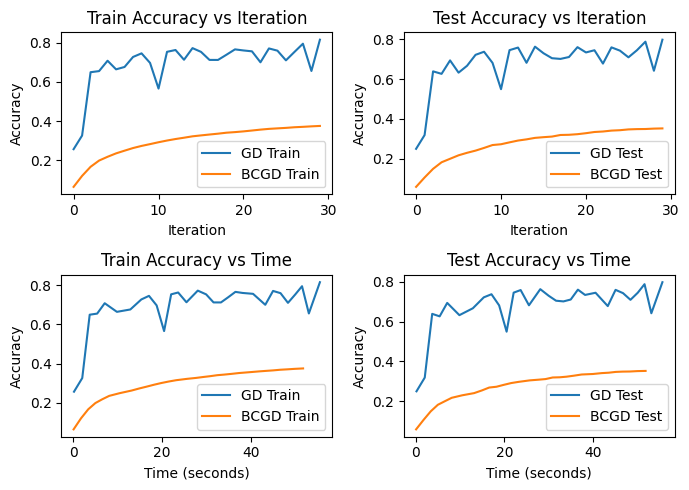

In [ ]:
import matplotlib.pyplot as plt

# Plotting Accuracy vs Iteration for Train and Test
plt.figure(figsize=(7, 5))

# Accuracy vs Iteration for Train
plt.subplot(2, 2, 1)
plt.plot(accuracies_train_gd, label='GD Train')
plt.plot(accuracies_train_bcgd, label='BCGD Train')
plt.title('Train Accuracy vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()

# Accuracy vs Iteration for Test
plt.subplot(2, 2, 2)
plt.plot(accuracies_test_gd, label='GD Test')
plt.plot(accuracies_test_bcgd, label='BCGD Test')
plt.title('Test Accuracy vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Accuracy vs Time for Train and Test
# Accuracy vs Time for Train
plt.subplot(2, 2, 3)
plt.plot(train_times_gd, accuracies_train_gd, label='GD Train')
plt.plot(times_bcgd, accuracies_train_bcgd, label='BCGD Train')
plt.title('Train Accuracy vs Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Accuracy')
plt.legend()

# Accuracy vs Time for Test
plt.subplot(2, 2, 4)
plt.plot(train_times_gd, accuracies_test_gd, label='GD Test')
plt.plot(times_bcgd, accuracies_test_bcgd, label='BCGD Test')
plt.title('Test Accuracy vs Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


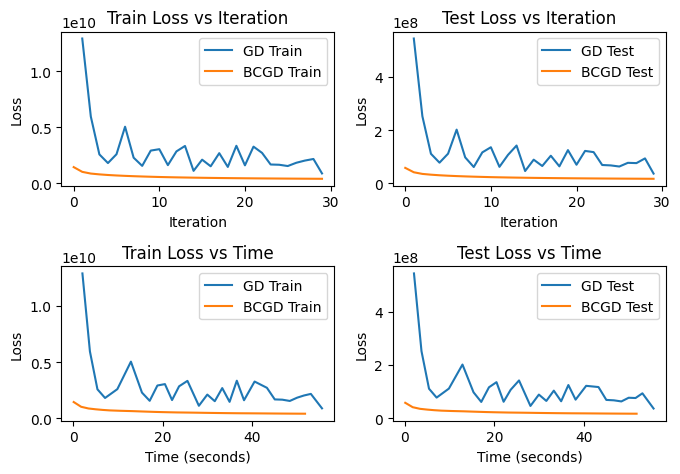

In [ ]:
import matplotlib.pyplot as plt

# Plotting Loss vs Iteration for Train and Test
plt.figure(figsize=(7, 5))

# Loss vs Iteration for Train
plt.subplot(2, 2, 1)
plt.plot(losses_train_gd, label='GD Train')
plt.plot(losses_train_bcgd, label='BCGD Train')
plt.title('Train Loss vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

# Loss vs Iteration for Test
plt.subplot(2, 2, 2)
plt.plot(losses_test_gd, label='GD Test')
plt.plot(losses_test_bcgd, label='BCGD Test')
plt.title('Test Loss vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

# Plotting Loss vs Time for Train and Test
# Loss vs Time for Train
plt.subplot(2, 2, 3)
plt.plot(train_times_gd, losses_train_gd, label='GD Train')
plt.plot(times_bcgd, losses_train_bcgd, label='BCGD Train')
plt.title('Train Loss vs Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Loss')
plt.legend()

# Loss vs Time for Test
plt.subplot(2, 2, 4)
plt.plot(train_times_gd, losses_test_gd, label='GD Test')
plt.plot(times_bcgd, losses_test_bcgd, label='BCGD Test')
plt.title('Test Loss vs Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Iris data:

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = load_iris()
X = data.data
y = data.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:

k = 3  # Number of classes in the Iris dataset
d = X_train.shape[1]  # Number of features (4 for Iris)
np.random.seed(42)

initial_X_gd = np.random.normal(0, 1, (d, k))


overall_start_time = time.time()


X_train_opt_gd, accuracies_train_gd, accuracies_test_gd, losses_train_gd, losses_test_gd, train_times_gd, total_train_time_gd = gradient_descent(
    X_train, y_train, X_test, y_test, k, initial_X_gd, 300, 'fixed', 1e-3
)


total_time = time.time() - overall_start_time


print("Training Complete")
print(f"Final Train Accuracy: {accuracies_train_gd[-1]:.4f}")
print(f"Final Test Accuracy: {accuracies_test_gd[-1]:.4f}")
print(f"Final Train Loss: {losses_train_gd[-1]:.4f}")
print(f"Final Test Loss: {losses_test_gd[-1]:.4f}")
print(f"Total Training Time: {total_train_time_gd:.2f} seconds")
print(f"Total Time (Training + Evaluation): {total_time:.2f} seconds")

Iteration 0: Time: 0.00s, Train Acc: 0.2333, Test Acc: 0.2000, Train Loss: 29244.4613, Test Loss: 2012.7585
Iteration 10: Time: 0.00s, Train Acc: 0.6167, Test Acc: 0.6667, Train Loss: 11703.1318, Test Loss: 725.6659
Iteration 20: Time: 0.00s, Train Acc: 0.7500, Test Acc: 0.8667, Train Loss: 8349.0710, Test Loss: 468.9165
Iteration 30: Time: 0.01s, Train Acc: 0.7750, Test Acc: 0.9000, Train Loss: 7274.8774, Test Loss: 390.1752
Iteration 40: Time: 0.01s, Train Acc: 0.8083, Test Acc: 0.9000, Train Loss: 6755.0224, Test Loss: 353.8965
Iteration 50: Time: 0.01s, Train Acc: 0.8083, Test Acc: 0.9000, Train Loss: 6437.5076, Test Loss: 332.6239
Iteration 60: Time: 0.01s, Train Acc: 0.8167, Test Acc: 0.9000, Train Loss: 6216.4088, Test Loss: 318.3004
Iteration 70: Time: 0.01s, Train Acc: 0.8167, Test Acc: 0.9000, Train Loss: 6049.7047, Test Loss: 307.7923
Iteration 80: Time: 0.01s, Train Acc: 0.8167, Test Acc: 0.9000, Train Loss: 5917.3769, Test Loss: 299.6314
Iteration 90: Time: 0.02s, Train Ac

In [ ]:
def gauss_southwell_bcgd(A_train, b_train, A_test, b_test, k, initial_X_bcgd, learning_rate, num_iterations):
    X = initial_X_bcgd
    m, d = A_train.shape
    accuracies_train = []
    accuracies_test = []
    losses_train = []
    losses_test = []
    times = []
    start_time = time.time()

    # Get the functions for calculating the objective and gradient for training and test data
    f_train, grad_f_train = generate_logistic_objective(A_train, b_train, k)

    f_test, _ = generate_logistic_objective(A_test, b_test, k)

    for i in range(num_iterations):
        # Calculate gradients for each class and find the class with the largest gradient norm
        gradient_norms = [np.linalg.norm(grad_f_train(X)[:, j]) for j in range(k)]
        idx = np.argmax(gradient_norms)
        block_gradient = grad_f_train(X)[:, idx]
        X[:, idx] -= learning_rate * block_gradient

        if i % 10 == 0:
            current_time = time.time() - start_time
            times.append(current_time)

            accuracy_train = compute_accuracy(X, A_train, b_train)
            accuracy_test = compute_accuracy(X, A_test, b_test)
            accuracies_train.append(accuracy_train)
            accuracies_test.append(accuracy_test)

            loss_train = f_train(X)
            loss_test = f_test(X)
            losses_train.append(loss_train)
            losses_test.append(loss_test)

            print(f"Iteration {i}: Time: {current_time:.2f}s, Train Acc: {accuracy_train:.4f}, Test Acc: {accuracy_test:.4f}, Train Loss: {loss_train:.4f}, Test Loss: {loss_test:.4f}, Updating class {idx}")

    total_time = time.time() - start_time
    return X, accuracies_train, accuracies_test, losses_train, losses_test, times, total_time


In [ ]:
np.random.seed(42)
initial_X_bcgd = np.random.normal(0, 1, (d, k))


optimized_X_bcgd, accuracies_train_bcgd, accuracies_test_bcgd, losses_train_bcgd, losses_test_bcgd, times_bcgd, total_time_bcgd = gauss_southwell_bcgd(
    X_train, y_train, X_test, y_test, k, initial_X_bcgd, 1e-3, 300
)


print("Optimization finished.")
if accuracies_train_bcgd:
    print(f"Final Train Accuracy: {accuracies_train_bcgd[-1]:.4f}")
    print(f"Final Test Accuracy: {accuracies_test_bcgd[-1]:.4f}")
else:
    print("No accuracy data available.")

if losses_train_bcgd:
    print(f"Final Train Loss: {losses_train_bcgd[-1]:.4f}")
    print(f"Final Test Loss: {losses_test_bcgd[-1]:.4f}")
else:
    print("No loss data available.")

print(f"Total time: {total_time_bcgd:.2f} seconds")

Iteration 0: Time: 0.00s, Train Acc: 0.2250, Test Acc: 0.2000, Train Loss: 30721.6661, Test Loss: 2121.0065, Updating class 0
Iteration 10: Time: 0.01s, Train Acc: 0.4417, Test Acc: 0.3667, Train Loss: 16558.1717, Test Loss: 1111.8706, Updating class 0
Iteration 20: Time: 0.01s, Train Acc: 0.6167, Test Acc: 0.6333, Train Loss: 11723.0385, Test Loss: 735.2919, Updating class 2
Iteration 30: Time: 0.01s, Train Acc: 0.7167, Test Acc: 0.8333, Train Loss: 9585.1906, Test Loss: 566.4992, Updating class 2
Iteration 40: Time: 0.02s, Train Acc: 0.7500, Test Acc: 0.9000, Train Loss: 8484.5125, Test Loss: 481.2600, Updating class 2
Iteration 50: Time: 0.02s, Train Acc: 0.7583, Test Acc: 0.8667, Train Loss: 7844.8854, Test Loss: 433.0970, Updating class 2
Iteration 60: Time: 0.02s, Train Acc: 0.7667, Test Acc: 0.8667, Train Loss: 7433.7616, Test Loss: 403.1755, Updating class 0
Iteration 70: Time: 0.02s, Train Acc: 0.7750, Test Acc: 0.8667, Train Loss: 7148.5185, Test Loss: 382.6977, Updating clas

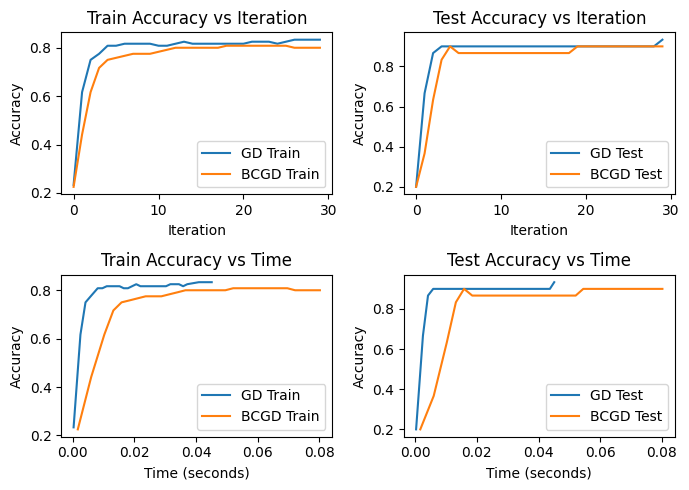

In [ ]:
import matplotlib.pyplot as plt

# Plotting Accuracy vs Iteration for Train and Test
plt.figure(figsize=(7, 5))

# Accuracy vs Iteration for Train
plt.subplot(2, 2, 1)
plt.plot(accuracies_train_gd, label='GD Train')
plt.plot(accuracies_train_bcgd, label='BCGD Train')
plt.title('Train Accuracy vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()

# Accuracy vs Iteration for Test
plt.subplot(2, 2, 2)
plt.plot(accuracies_test_gd, label='GD Test')
plt.plot(accuracies_test_bcgd, label='BCGD Test')
plt.title('Test Accuracy vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Accuracy vs Time for Train and Test
# Accuracy vs Time for Train
plt.subplot(2, 2, 3)
plt.plot(train_times_gd, accuracies_train_gd, label='GD Train')
plt.plot(times_bcgd, accuracies_train_bcgd, label='BCGD Train')
plt.title('Train Accuracy vs Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Accuracy')
plt.legend()

# Accuracy vs Time for Test
plt.subplot(2, 2, 4)
plt.plot(train_times_gd, accuracies_test_gd, label='GD Test')
plt.plot(times_bcgd, accuracies_test_bcgd, label='BCGD Test')
plt.title('Test Accuracy vs Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


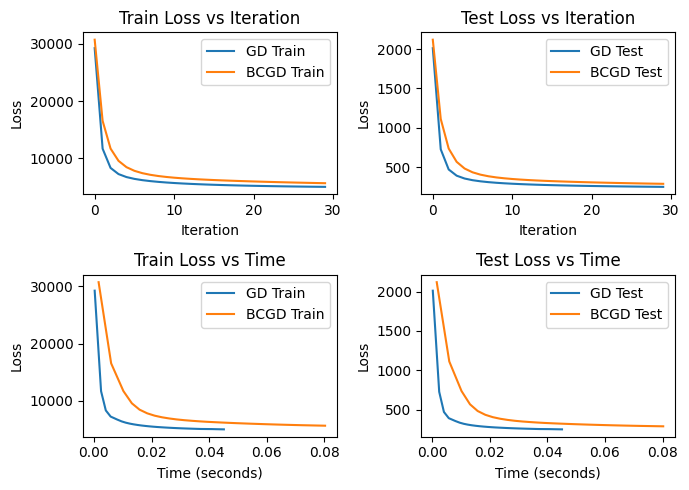

In [ ]:
import matplotlib.pyplot as plt


# Plotting Loss vs Iteration for Train and Test
plt.figure(figsize=(7, 5))

# Loss vs Iteration for Train
plt.subplot(2, 2, 1)
plt.plot(losses_train_gd, label='GD Train')
plt.plot(losses_train_bcgd, label='BCGD Train')
plt.title('Train Loss vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

# Loss vs Iteration for Test
plt.subplot(2, 2, 2)
plt.plot(losses_test_gd, label='GD Test')
plt.plot(losses_test_bcgd, label='BCGD Test')
plt.title('Test Loss vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

# Plotting Loss vs Time for Train and Test
# Loss vs Time for Train
plt.subplot(2, 2, 3)
plt.plot(train_times_gd, losses_train_gd, label='GD Train')
plt.plot(times_bcgd, losses_train_bcgd, label='BCGD Train')
plt.title('Train Loss vs Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Loss')
plt.legend()

# Loss vs Time for Test
plt.subplot(2, 2, 4)
plt.plot(train_times_gd, losses_test_gd, label='GD Test')
plt.plot(times_bcgd, losses_test_bcgd, label='BCGD Test')
plt.title('Test Loss vs Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
